# Micro-Credit Defaulter Model

### Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on

### Exercise:

We will build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan.

In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

WORK:

1) IMPORTING LIBRARIES

2) LOADING DATASET & DESCRIPTION

3) EXPLORATORY DATA ANALYSIS

4) DATA PREPROCESSING OF DATA

5) LABEL ENCODING

6) SPLITING DATA AND APPLYING train_test_split

7) SCALING

8) FINDING BEST RANDOM STATE

9) FINDING BEST ALGORITHM

10) AUC_ROC CURVE

11) SAVING OUR MODEL

12) RESULTS & CONCLUSION

### TARGET VARIABLE:

In this context, the use classification models to predict the "label"(whether the customer will be paying back the loaned amount within 5 days of insurance of loan)

"label" is our target varaible.

In [1]:
## importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Data file.csv") 

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df.head(2)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10


In [5]:
pd.set_option("display.max_columns",None)

In [6]:
df.head(2)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10


In [7]:
df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [8]:
#l looking last 10 rows

df.tail(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209583,209584,1,30201I82732,935.0,15.550667,15.550667,140.44,140.44,4.0,0.0,1547,3,2.0,4641.0,1547.0,41.00,5,2,8508,1547.0,41.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,UPW,2016-06-02
209584,209585,0,70387I89237,945.0,0.000000,0.000000,78.30,78.30,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,UPW,2016-06-06
209585,209586,1,12227I90843,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,2309,4,16.0,7696.0,1924.0,34.00,4,16,7696,1924.0,34.00,0.0,0.0,0,0,5,30,6.0,0.0,5.0,30,6,0.0,5.2,5.200000,UPW,2016-07-04
209586,209587,1,60331I70370,254.0,20079.157333,20228.090000,4003.12,5173.74,2.0,0.0,1539,9,4.0,17243.0,1547.0,37.00,17,2,33719,1547.0,37.00,0.0,0.0,0,0,6,66,12.0,0.0,15.0,120,12,0.0,3.0,2.400000,UPW,2016-07-22
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,3178,3,3.0,12143.0,3178.0,914.00,5,17,14455,3178.0,28.00,0.0,0.0,0,0,1,12,12.0,1.0,3.0,24,12,1.0,0.0,30.000000,UPW,2016-08-02
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [9]:
df.shape

(209593, 37)

In [10]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [11]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_


label---->	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn--->	mobile number of user

aon---->	age on cellular network in days

daily_decr30---->	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90---->	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30---->	Average main account balance over last 30 days

rental90---->	Average main account balance over last 90 days

last_rech_date_ma---->	Number of days till last recharge of main account

last_rech_date_da---->	Number of days till last recharge of data account

last_rech_amt_ma---->	Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30---->	Number of times main account got recharged in last 30 days

fr_ma_rech30---->	Frequency of main account recharged in last 30 days

sumamnt_ma_rech30---->	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30---->	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian                                   Rupiah)

medianmarechprebal30---->	Median of main account balance just before recharge in last 30 days at user level (in Indonesian                                       Rupiah)

cnt_ma_rech90---->	Number of times main account got recharged in last 90 days

fr_ma_rech90---->	Frequency of main account recharged in last 90 days

sumamnt_ma_rech90---->	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90---->	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian                                        Rupiah)

medianmarechprebal90---->	Median of main account balance just before recharge in last 90 days at user level (in Indonasian                                   Rupiah)

cnt_da_rech30---->	Number of times data account got recharged in last 30 days

fr_da_rech30---->	Frequency of data account recharged in last 30 days

cnt_da_rech90---->	Number of times data account got recharged in last 90 days

fr_da_rech90---->	Frequency of data account recharged in last 90 days

cnt_loans30---->	Number of loans taken by user in last 30 days

amnt_loans30---->	Total amount of loans taken by user in last 30 days

maxamnt_loans30---->	maximum amount of loan taken by the user in last 30 days

medianamnt_loans30---->	Median of amounts of loan taken by the user in last 30 days

cnt_loans90---->	Number of loans taken by user in last 90 days

amnt_loans90---->	Total amount of loans taken by user in last 90 days

maxamnt_loans90---->	maximum amount of loan taken by the user in last 90 days

medianamnt_loans90---->	Median of amounts of loan taken by the user in last 90 days

payback30---->	Average payback time in days over last 30 days

payback90---->	Average payback time in days over last 90 days

pcircle---->	telecom circle

pdate---->	date


# DESCRIBING DATA

In [12]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


describe function only shows the variable which are numeric.

In [13]:
# let's get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [14]:
# Look at the values in each columns 
for i in df:
    print(df[i].value_counts())
    print("____________________________________________________________")

2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64
____________________________________________________________
1    183431
0     26162
Name: label, dtype: int64
____________________________________________________________
47819I90840    7
04581I85330    7
60744I91197    6
94119I84456    6
71742I90843    6
              ..
69781I85330    1
14680I90844    1
69029I84451    1
24366I84454    1
45244I70786    1
Name: msisdn, Length: 186243, dtype: int64
____________________________________________________________
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64
____________________________________________________________
0.000000       4144
500.0000

# EXPLORATORY DATA ANALYSIS

1    183431
0     26162
Name: label, dtype: int64

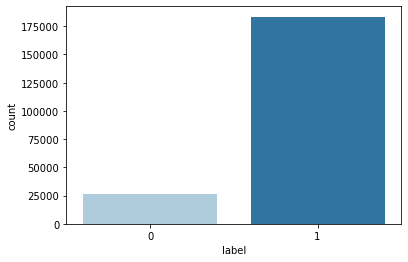

In [15]:
#Get the count of label(our target variable)

sns.countplot(x = 'label', data = df, palette="Paired",alpha=1)
df["label"].value_counts()

In [16]:
# we use histogram for showing our continous variables.

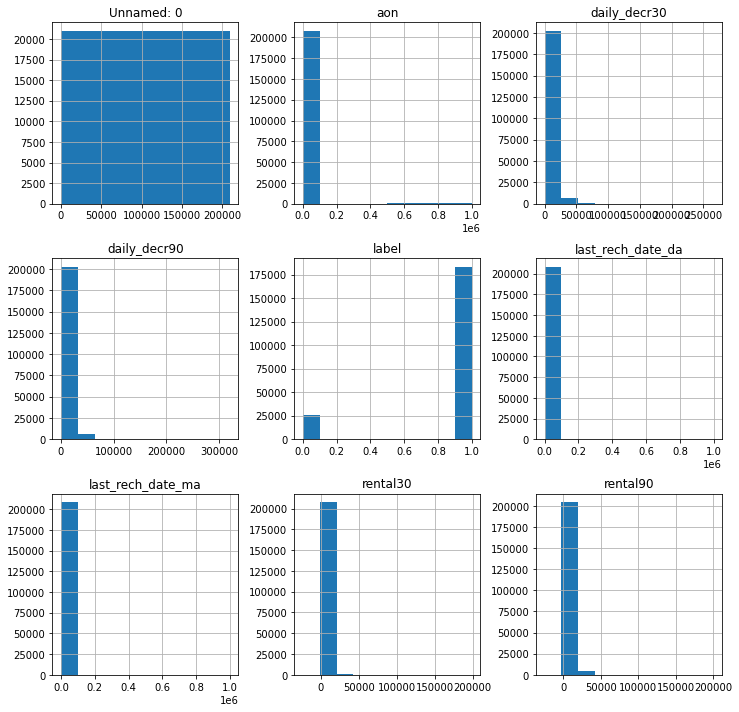

In [17]:
# first, analysing top 10 features:

df.hist = df.iloc[:,0:10].hist(figsize=(12,12), sharex=False)

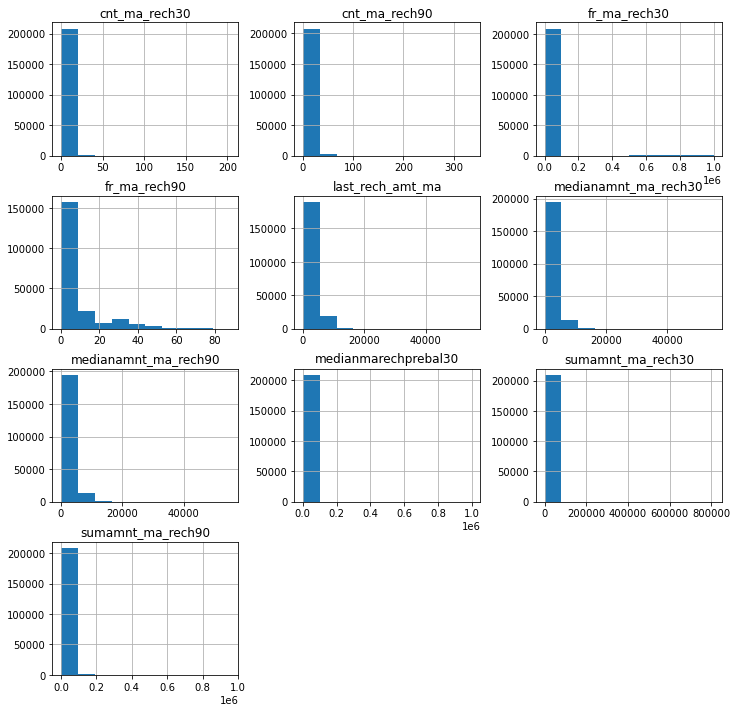

In [18]:
# Analysing next 10 features:

df.hist = df.iloc[:,10:20].hist(figsize=(12,12), sharex=False)

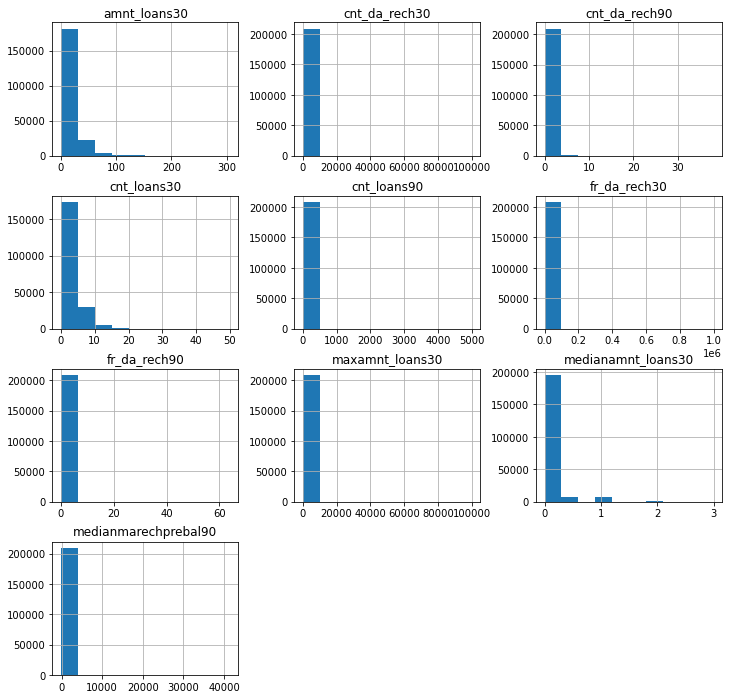

In [19]:
# Analysing next 10 features:

df.hist = df.iloc[:,20:30].hist(figsize=(12,12), sharex=False)

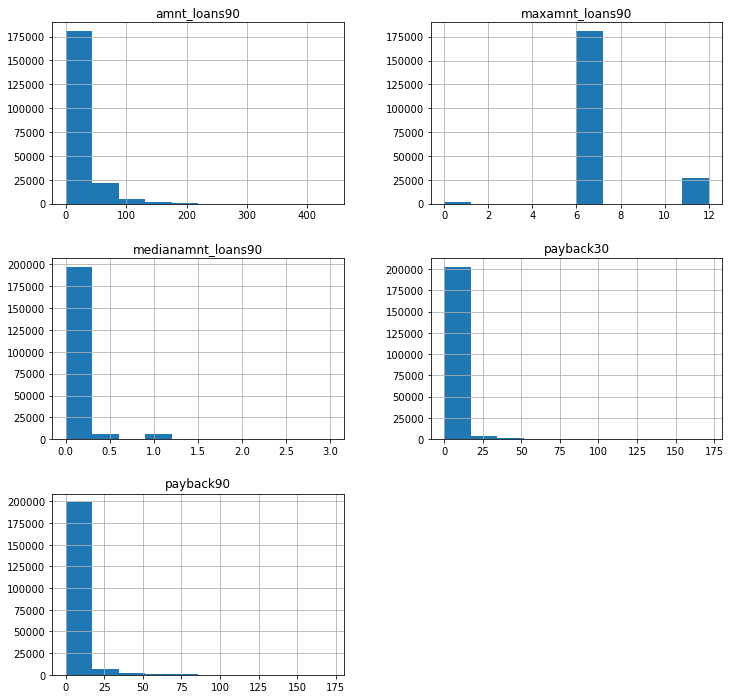

In [20]:
# Analysing last few remaining attributes:

df.hist = df.iloc[:,30:].hist(figsize=(12,12), sharex=False)

#### OBSERVATION:

We can observe from above graphs that in all the independent attributes right skewness is present except maxamnt_loans90.


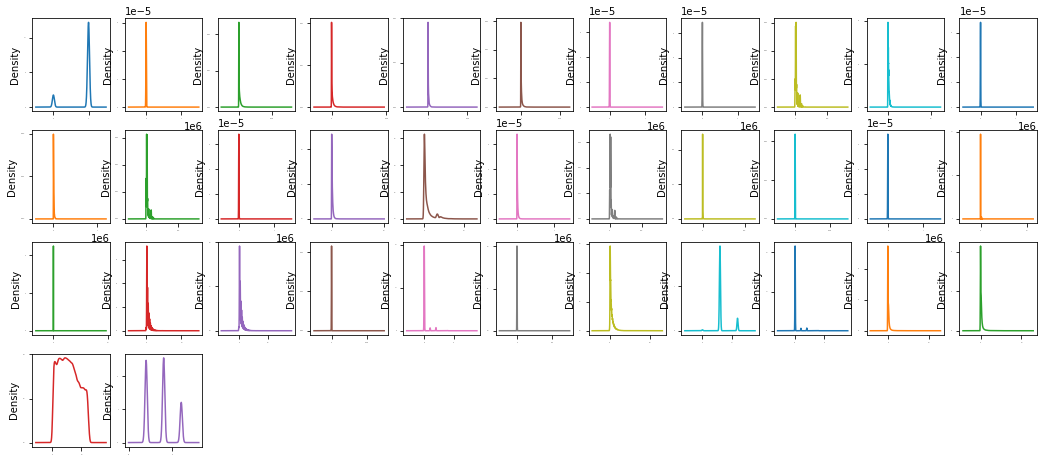

In [69]:
df.plot(kind="density", subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

# OUTLIERS

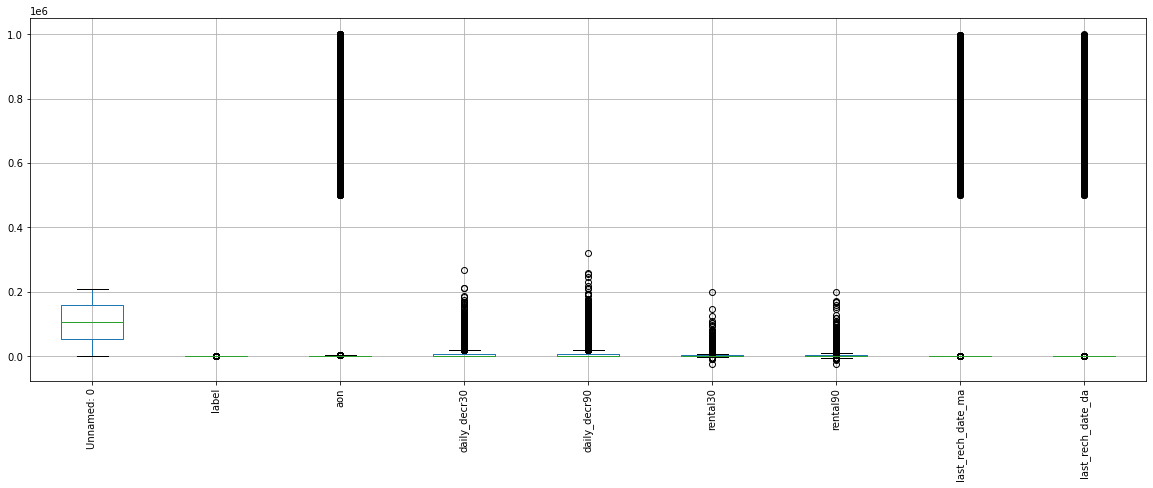

In [23]:
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation = 90)
plt.show()

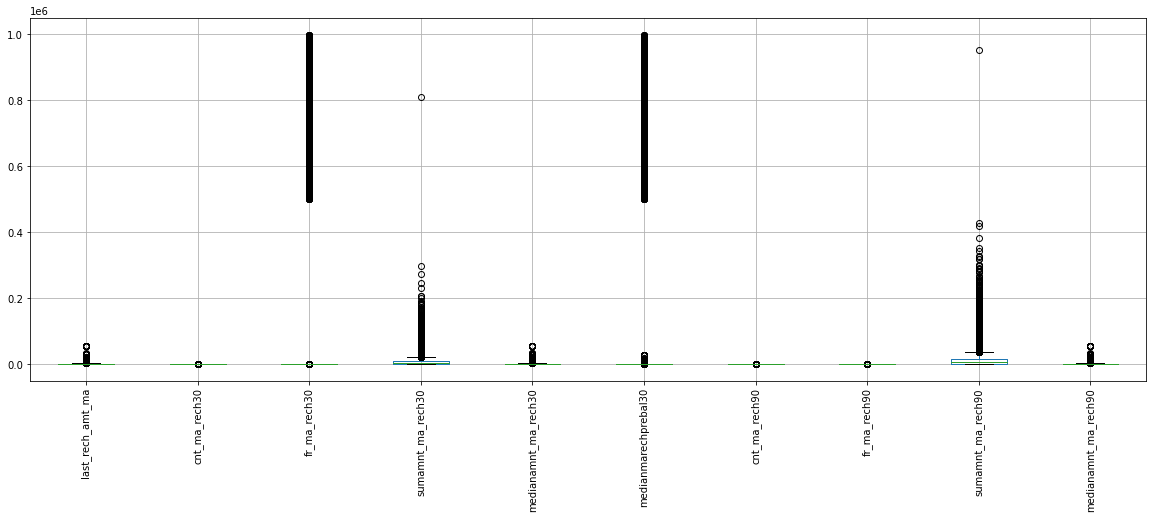

In [24]:
df.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation = 90)
plt.show()

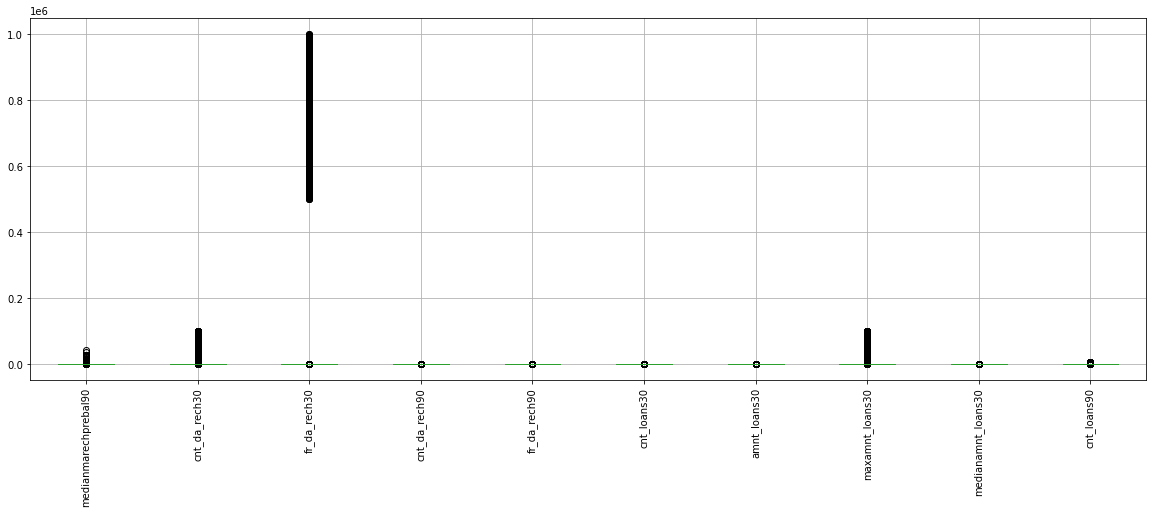

In [25]:
df.iloc[:,20:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation = 90)
plt.show()

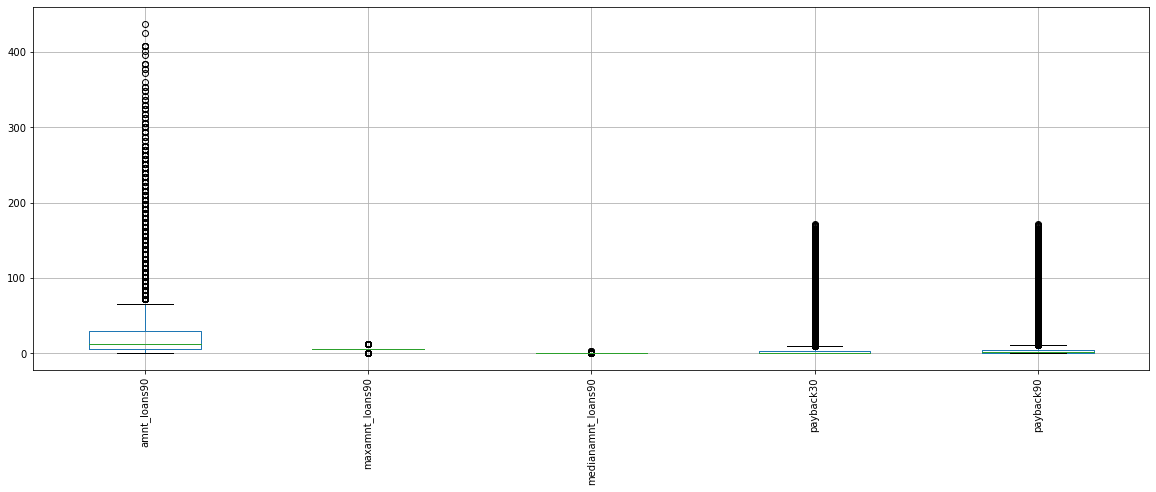

In [26]:
df.iloc[:,30:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation = 90)
plt.show()

OBSERVATION:
    
Outliers are present in our datset, we will treat them later.

# DATA PRE-PROCESSING

#### CLEANING OUR DATASET
Data Cleaning and pre-processing is very important part to create any machine learning model. The cleaner the data will be, the better the prediction will come.

This data provided is raw and we have to run many functions to clean.

In [27]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

 NO null values present in our dataset.

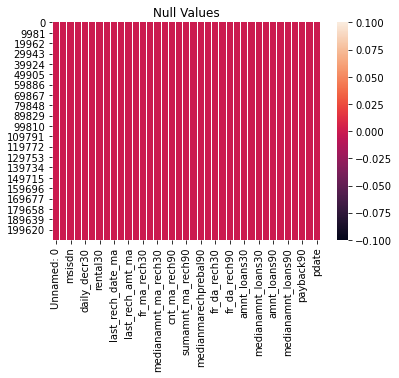

In [28]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [29]:
# check unique values in dataset

df.apply(lambda x: len(x.unique()))

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

pcircle has only one unique value. We will drop this column later.

In [30]:
# Handling date column

In [31]:
df["day"]=pd.DatetimeIndex(df["pdate"]).day

In [32]:
df['month'] = pd.DatetimeIndex(df['pdate']).month

In [33]:
df['year'] = pd.DatetimeIndex(df['pdate']).year

In [34]:
df.head(2)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,day,month,year
0,1,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20,20,7,2016
1,2,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10,10,8,2016


In [35]:
# checking unique values in year

df["year"].value_counts()

2016    209593
Name: year, dtype: int64

only 1 unique value. That means it is not contributing anything in our predictions.

#### DROPING IRRELEVANT COLUMNS:

In [36]:
df = df.drop(columns = ['Unnamed: 0', 'msisdn', 'pcircle','pdate','year'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

# FINDING CORRELATION

In [38]:
corr= df.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.068643,0.156148


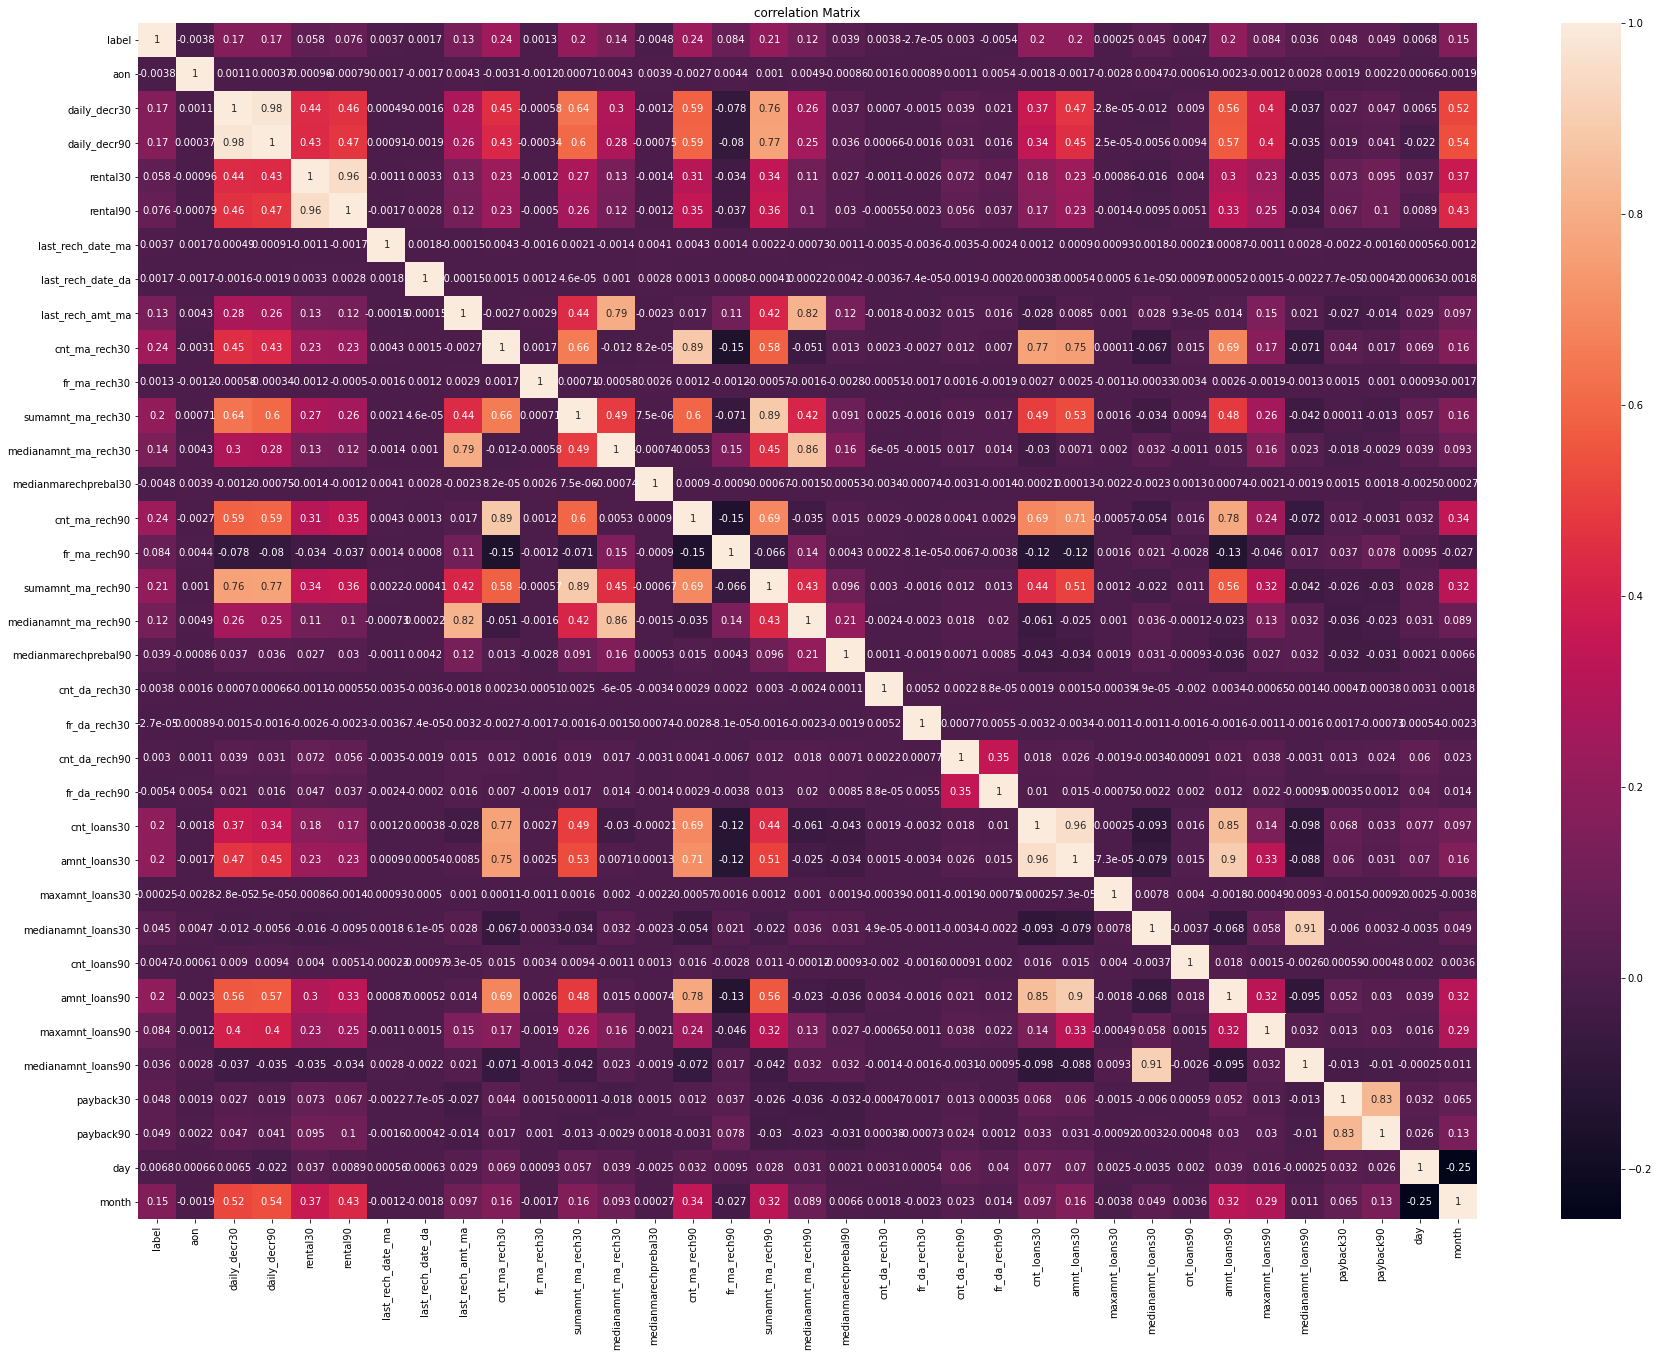

In [39]:
corr_mat=df.corr()   

plt.figure(figsize=[30,22])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

OBSERVATIONS:

daily_decr30 & daily_decr90 are strongly correleated.

daily_decr30 & sumamnt_ma_rech90 are strongly correleated.

rental30 & rental90 are strongly correleated.

medianamnt_ma_rech30 & last_rech_amt_ma are strongly correleated.

amnt_loans90 & amnt_loans30 are strongly correleated.

In [40]:
# checking correlation with our target variable:

corr_matrix=df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
day                     0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_lo

<function matplotlib.pyplot.show(*args, **kw)>

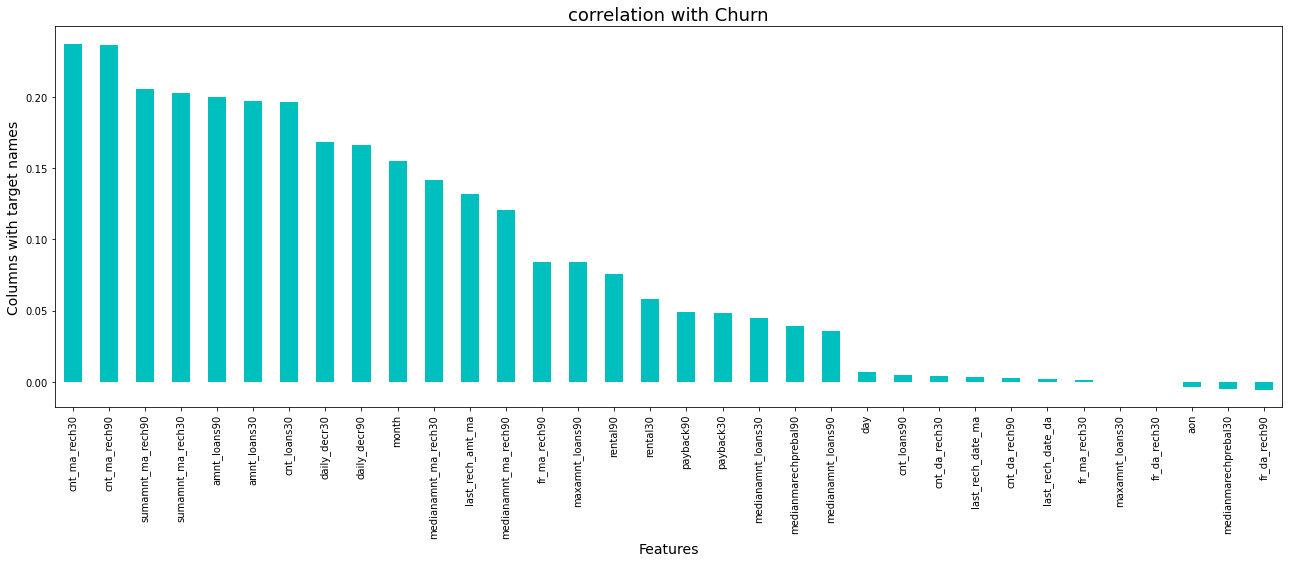

In [41]:
# visualizing correlation with our target variable:

plt.figure(figsize=(22,7))
df.corr()["label"].sort_values(ascending=False).drop(["label"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation with Churn",fontsize=18)
plt.show

# Treating Outliers

In [42]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64),
 array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

In [43]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [44]:
df.shape

(209593, 35)

In [45]:
df_new_z.shape

(161465, 35)

In [46]:
Data_loss=((209593-161465)/209593)*100

In [47]:
Data_loss

22.962598941758554

We will loss our 22% od data with z-score. It will give baised predictions. we cannot afford to loss such a huge data.

We will continue with our previous dataset.

# Splitting the data into X(INDEPENDENT VAR) & Y(DEPENDENT VAR)

In [48]:
x= df.drop("label",axis=1)     # independent variable
y= df["label"]                 # dependent variable

In [49]:
x.columns.size

34

In [50]:
x.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'day', 'month'],
      dtype='object')

# Treating Skweness

In [52]:
x.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

In [53]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x_new=pd.DataFrame(x_new,columns=x.columns)

# SCALING

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x_new=pd.DataFrame(scaler.fit_transform(x_new), columns= x_new.columns)

In [55]:
x_new

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
0,0.537105,0.966138,0.966667,0.729892,0.772163,0.611505,0.962027,0.267205,0.206106,0.664758,0.171847,0.262157,0.505252,0.181799,0.802911,0.173456,0.254662,0.125380,0.0,0.0,0.0,0.0,0.506193,0.441865,0.456967,0.0,0.486667,0.486415,0.643145,0.0,0.899398,0.855069,0.722202,0.585862
1,0.548235,0.972968,0.973012,0.738319,0.779368,0.621166,0.962027,0.439478,0.130010,0.000000,0.211484,0.434141,0.507803,0.114335,0.000000,0.212161,0.426152,0.130336,0.0,0.0,0.0,0.0,0.352901,0.441865,0.554617,0.0,0.343136,0.486415,1.000000,0.0,0.000000,0.000000,0.413152,1.000000
2,0.544529,0.963178,0.963883,0.731850,0.773766,0.612643,0.962027,0.267205,0.130010,0.000000,0.136222,0.262157,0.507971,0.114335,0.000000,0.138403,0.254662,0.130743,0.0,0.0,0.0,0.0,0.352901,0.334339,0.456967,0.0,0.343136,0.378730,0.643145,0.0,0.000000,0.000000,0.694398,1.000000
3,0.535953,0.954255,0.955423,0.729688,0.771868,0.625977,0.962027,0.221707,0.000000,0.000000,0.000000,0.000000,0.504259,0.114335,0.000000,0.117740,0.210006,0.124688,0.0,0.0,0.0,0.0,0.506193,0.441865,0.456967,0.0,0.486667,0.486415,0.643145,0.0,0.000000,0.000000,0.259154,0.000000
4,0.552323,0.957298,0.958331,0.732367,0.774216,0.613587,0.962027,0.311691,0.390323,0.320627,0.315417,0.306436,0.506572,0.366777,0.361939,0.328273,0.325818,0.128185,0.0,0.0,0.0,0.0,0.764556,0.651263,0.456967,0.0,0.718202,0.678819,0.643145,0.0,0.515521,0.442457,0.776308,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.541232,0.957314,0.958346,0.732342,0.774195,0.610039,0.962027,0.384791,0.260118,0.320627,0.255753,0.346142,0.508702,0.229928,0.361939,0.255089,0.338154,0.132607,0.0,0.0,0.0,0.0,0.506193,0.441865,0.456967,0.0,0.486667,0.486415,0.643145,0.0,0.337569,0.280849,0.637106,0.000000
209589,0.554275,0.954963,0.956103,0.733921,0.775568,0.613587,0.962027,0.204884,0.302024,0.216303,0.172105,0.200323,0.510289,0.324179,0.361939,0.189231,0.193580,0.133982,0.0,0.0,0.0,0.0,0.596460,0.508062,0.456967,0.0,0.569229,0.549627,0.643145,0.0,0.337569,0.280849,0.481712,0.000000
209590,0.553349,0.972832,0.972913,0.742766,0.788160,0.612643,0.962027,0.267205,0.336271,0.539287,0.246960,0.262157,0.507466,0.415748,0.542065,0.305438,0.254662,0.129222,0.0,0.0,0.0,0.0,0.657511,0.651263,0.554617,0.0,0.694120,0.715990,1.000000,0.0,0.625075,0.540536,0.952671,0.585862
209591,0.562445,0.973143,0.973210,0.730489,0.773959,0.611505,0.970856,0.204884,0.336271,0.432723,0.268864,0.200323,0.510342,0.324179,0.497815,0.302095,0.303671,0.133179,0.0,0.0,1.0,0.0,0.506193,0.508062,0.554617,0.0,0.569229,0.594061,1.000000,0.0,0.000000,0.718968,0.854143,0.585862


# FINDING BEST RANDOM STATE

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.20, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.8862806841766263 on Random_state 77


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [58]:
LR=LogisticRegression()
svc= SVC()
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn= KNeighborsClassifier()

In [59]:
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.20, random_state=77)
for i in (LR, svc, dtc, rf,knn):
    i.fit(x_train, y_train)
    
    pred = i.predict(x_test)
    
    print(i, accuracy_score(y_test,pred))
    print(i,confusion_matrix(y_test,predrf))
    print(i,classification_report(y_test,predrf))

LogisticRegression() 0.8862806841766263
LogisticRegression() [[  116  4995]
 [  808 36000]]
LogisticRegression()               precision    recall  f1-score   support

           0       0.13      0.02      0.04      5111
           1       0.88      0.98      0.93     36808

    accuracy                           0.86     41919
   macro avg       0.50      0.50      0.48     41919
weighted avg       0.79      0.86      0.82     41919

SVC() 0.8934373434480785
SVC() [[  116  4995]
 [  808 36000]]
SVC()               precision    recall  f1-score   support

           0       0.13      0.02      0.04      5111
           1       0.88      0.98      0.93     36808

    accuracy                           0.86     41919
   macro avg       0.50      0.50      0.48     41919
weighted avg       0.79      0.86      0.82     41919

DecisionTreeClassifier() 0.8836804313079988
DecisionTreeClassifier() [[  116  4995]
 [  808 36000]]
DecisionTreeClassifier()               precision    recall  f1-sc

We are getting highest accuracy with RandomForestClassifier i.e. 92%, and F-1 score is 0.86.

we will continue with RandomForestClassifier.

## Tunning with best Parameters:

In [60]:
### importing GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [61]:
parameters = {'criterion':("gini", "entropy"), "max_features":["auto","sqrt","log2"]}

x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.30, random_state=77)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'max_features': 'log2', 'criterion': 'entropy'}


In [62]:
clf_pred=clf.best_estimator_.predict(x_test)

In [63]:
accuracy_score(y_test,clf_pred)

0.9232004834759375

In [64]:
rf=RandomForestClassifier( criterion='entropy',  max_features='log2',  random_state=77)

In [65]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=77)

# AUC_ROC CURVE

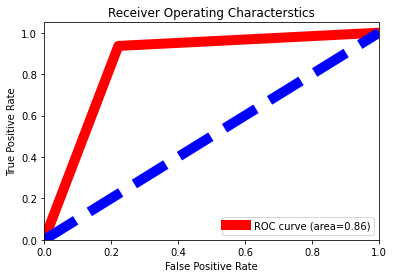

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(clf_pred,y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=10, label="ROC curve (area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="blue", lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

# SAVING OUR MODEL

In [67]:
import pickle
filename= "MicroCredit_rf.pkl"
pickle.dump(rf,open(filename,"wb"))